**Praktikum 1**

**Klasifikasi Iris dengan Perceptron**

Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.
Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

In [218]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [219]:
# Load data 
df = pd.read_csv('data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


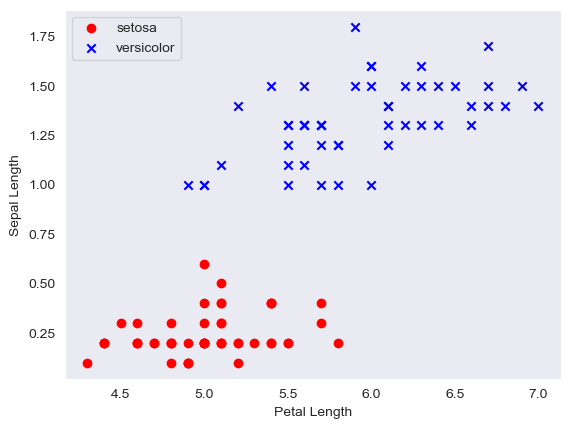

In [220]:
# Visualisasi
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

a, b = 'SepalLengthCm', 'PetalWidthCm'
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [221]:
# Membuat kelas perception
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.errors_ = None
        self.w_ = None
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [222]:
# Pilih data dan encoding label
y = df.iloc[0:100, 5].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [1, 4]].values # slice data latih

In [223]:
# Fitting model
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

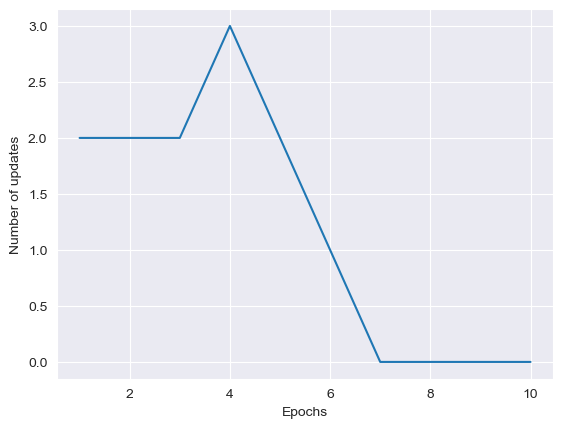

In [224]:
# Visualisasi Nilai Error Per Epoch
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [240]:
# Visualiasasi Decision Boundary

# Buat fungsi untuk plot decision region
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier,
                          test_idx=None, resolution=0.02):
    
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=[cmap(idx)],
                   marker=markers[idx], label=cl)
        
    # Highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidths=1, marker='o',
                    s=55, label='test set')

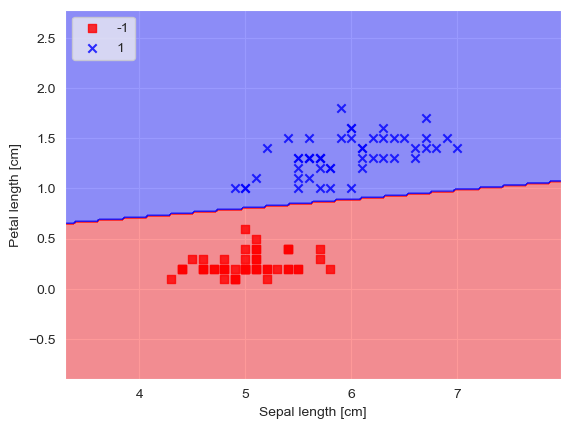

In [241]:
plot_decision_regions(X, y, ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()